<a href="https://colab.research.google.com/github/tinycar2008/cnn-predict-chocolate-cake-flaws/blob/main/20241020_Assignment4_CNN_chocolate_cake_prod.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

### TASK OVERVIEW

> Using CNN, the primary goal of this assignment is to build a model that detects production
efficiency flaws on food-processing conveyor belt.
The following photograph shows a section of the conveyor belt that contains an acceptable level of products, in this case, portions of chocolate cakes.

However, sometimes the production slows down, and the output goes down to an alert level, as shown in the following photograph.

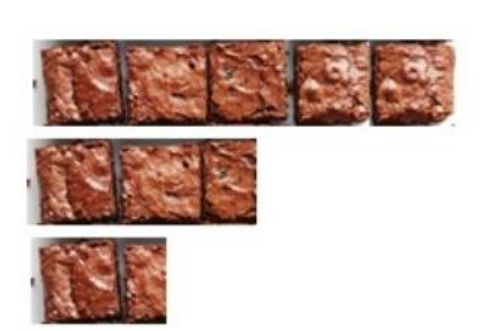


In [ ]:
# Mount Google Drive

import os
from google.colab import drive
drive.mount('/content/gdrive')

Mounted at /content/gdrive


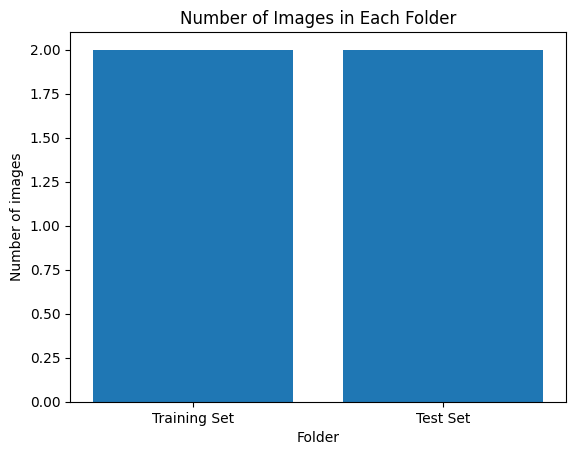

In [ ]:
#Inspect number of images in each folder

import os
import matplotlib.pyplot as plt

train_count = len(os.listdir('/content/gdrive/MyDrive/03_Training/00_KalAcdamy_Bootcamp/Assignment_4_CNN/Chocolate_Cake_Production/Files/CNN_Dataset_Production/training_set'))

test_count = len(os.listdir('/content/gdrive/MyDrive/03_Training/00_KalAcdamy_Bootcamp/Assignment_4_CNN/Chocolate_Cake_Production/Files/CNN_Dataset_Production/test_set'))

# Create bar chart

folders = ['Training Set', 'Test Set']
counts = [train_count, test_count]

plt.bar(folders, counts)
plt.xlabel('Folder')
plt.ylabel('Number of images')
plt.title('Number of Images in Each Folder')
plt.show()

In [ ]:
import tensorflow as tf
from tensorflow.keras.preprocessing.image import ImageDataGenerator

## Data processing

* Because all images are quite the same, there is a high chance of overfitting

In [ ]:
# Define training data generator and augmentation

train_datagen = ImageDataGenerator(
    rescale=1./255,
    shear_range=0.2,
    zoom_range=0.2,
    horizontal_flip=True,
    rotation_range=20,
    width_shift_range=0.2,
    height_shift_range=0.2,
    validation_split=0.2
)

training_set = train_datagen.flow_from_directory(
    '/content/gdrive/MyDrive/03_Training/00_KalAcdamy_Bootcamp/Assignment_4_CNN/Chocolate_Cake_Production/Files/CNN_Dataset_Production/training_set',
    target_size=(238, 238),
    batch_size=32,
    class_mode='binary'
)


Found 16 images belonging to 2 classes.


In [ ]:
# Define test data generator

test_datagen = ImageDataGenerator(rescale=1./255)
test_set = test_datagen.flow_from_directory(
    '/content/gdrive/MyDrive/03_Training/00_KalAcdamy_Bootcamp/Assignment_4_CNN/Chocolate_Cake_Production/Files/CNN_Dataset_Production/test_set',
    target_size=(238, 238),
    batch_size=32,
    class_mode='binary'
)

Found 20 images belonging to 2 classes.


In [ ]:
#Innitalising CNN model

from tensorflow import keras
from tensorflow.keras import layers, models


In [ ]:
cnn = models.Sequential([
    layers.Conv2D(32, (3, 3), activation='relu', input_shape=(238, 238, 3)),
    layers.BatchNormalization(),
    layers.MaxPooling2D((2, 2)),
    layers.Conv2D(64, (3, 3), activation='relu'),
    layers.BatchNormalization(),
    layers.MaxPooling2D((2, 2)),
    layers.Conv2D(64, (3, 3), activation='relu'),
    layers.BatchNormalization(),
    layers.MaxPooling2D((2, 2)),
    layers.Conv2D(128, (3, 3), activation='relu'),
    layers.BatchNormalization(),
    layers.MaxPooling2D((2, 2)),
    layers.Flatten(),
    layers.Dense(128, activation='relu'),
    layers.BatchNormalization(),
    layers.Dropout(0.5),
    layers.Dense(64, activation='relu'),
    layers.BatchNormalization(),
    layers.Dropout(0.5),
    layers.Dense(1, activation='sigmoid')
])

cnn.summary()

/usr/local/lib/python3.10/dist-packages/keras/src/layers/convolutional/base_conv.py:107: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


Model: "sequential_4"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━┓
┃ Layer (type)                         ┃ Output Shape                ┃         Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━┩
│ conv2d_17 (Conv2D)                   │ (None, 236, 236, 32)        │             896 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ batch_normalization_6                │ (None, 236, 236, 32)        │             128 │
│ (BatchNormalization)                 │                             │                 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ max_pooling2d_9 (MaxPooling2D)       │ (None, 118, 118, 32)        │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ conv2d_18 (Conv2D)                   │ (None, 116, 116, 64)        │          18,496 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ batch_normalization_7                │ (None, 116, 116, 64)        │             256 │
│ (BatchNormalization)                 │                             │                 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ max_pooling2d_10 (MaxPooling2D)      │ (None, 58, 58, 64)          │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ conv2d_19 (Conv2D)                   │ (None, 56, 56, 64)          │          36,928 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ batch_normalization_8                │ (None, 56, 56, 64)          │             256 │
│ (BatchNormalization)                 │                             │                 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ max_pooling2d_11 (MaxPooling2D)      │ (None, 28, 28, 64)          │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ conv2d_20 (Conv2D)                   │ (None, 26, 26, 128)         │          73,856 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ batch_normalization_9                │ (None, 26, 26, 128)         │             512 │
│ (BatchNormalization)                 │                             │                 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ max_pooling2d_12 (MaxPooling2D)      │ (None, 13, 13, 128)         │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ flatten_4 (Flatten)                  │ (None, 21632)               │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_9 (Dense)                      │ (None, 128)                 │       2,769,024 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ batch_normalization_10               │ (None, 128)                 │             512 │
│ (BatchNormalization)                 │                             │                 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dropout_2 (Dropout)                  │ (None, 128)                 │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_10 (Dense)                     │ (None, 64)                  │           8,256 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ batch_normalization_11               │ (None, 64)                  │             256 │
│ (BatchNormalization)                 │                             │                 │
├──────────────────────────────────────┼─────────────────────────────┼──────────────

 Total params: 2,909,441 (11.10 MB)

 Trainable params: 2,908,481 (11.09 MB)

 Non-trainable params: 960 (3.75 KB)

In [ ]:
#Compile the model

cnn.compile(optimizer=tf.keras.optimizers.Adam(learning_rate=0.0001),
              loss='binary_crossentropy',
              metrics=['accuracy',tf.keras.metrics.Precision(), tf.keras.metrics.Recall()]
)

In [ ]:
#Train the model

history = cnn.fit(
    training_set,
    steps_per_epoch=training_set.samples // training_set.batch_size, # Use training_set.samples and training_set.batch_size
    epochs = 50,
    validation_data=test_set,
    validation_steps=test_set.samples // test_set.batch_size # Use test_set.batch_size
)

Epoch 1/50


/usr/local/lib/python3.10/dist-packages/keras/src/trainers/data_adapters/py_dataset_adapter.py:121: UserWarning: Your `PyDataset` class should call `super().__init__(**kwargs)` in its constructor. `**kwargs` can include `workers`, `use_multiprocessing`, `max_queue_size`. Do not pass these arguments to `fit()`, as they will be ignored.
  self._warn_if_super_not_called()


1/1 ━━━━━━━━━━━━━━━━━━━━ 12s 12s/step - accuracy: 0.3125 - loss: 1.3828 - precision_2: 0.2857 - recall_2: 0.2500 - val_accuracy: 0.5000 - val_loss: 0.6851 - val_precision_2: 0.5000 - val_recall_2: 1.0000
Epoch 2/50
1/1 ━━━━━━━━━━━━━━━━━━━━ 10s 10s/step - accuracy: 0.2500 - loss: 1.6796 - precision_2: 0.2500 - recall_2: 0.2500 - val_accuracy: 0.5000 - val_loss: 0.6854 - val_precision_2: 0.5000 - val_recall_2: 1.0000
Epoch 3/50
1/1 ━━━━━━━━━━━━━━━━━━━━ 8s 8s/step - accuracy: 0.3750 - loss: 1.0035 - precision_2: 0.4000 - recall_2: 0.5000 - val_accuracy: 1.0000 - val_loss: 0.6876 - val_precision_2: 1.0000 - val_recall_2: 1.0000
Epoch 4/50
1/1 ━━━━━━━━━━━━━━━━━━━━ 8s 8s/step - accuracy: 0.4375 - loss: 1.3493 - precision_2: 0.4545 - recall_2: 0.6250 - val_accuracy: 0.5000 - val_loss: 0.6905 - val_precision_2: 0.0000e+00 - val_recall_2: 0.0000e+00
Epoch 5/50
1/1 ━━━━━━━━━━━━━━━━━━━━ 8s 8s/step - accuracy: 0.5625 - loss: 1.0013 - precision_2: 0.5714 - recall_2: 0.5000 - val_accuracy: 0.5000 - 

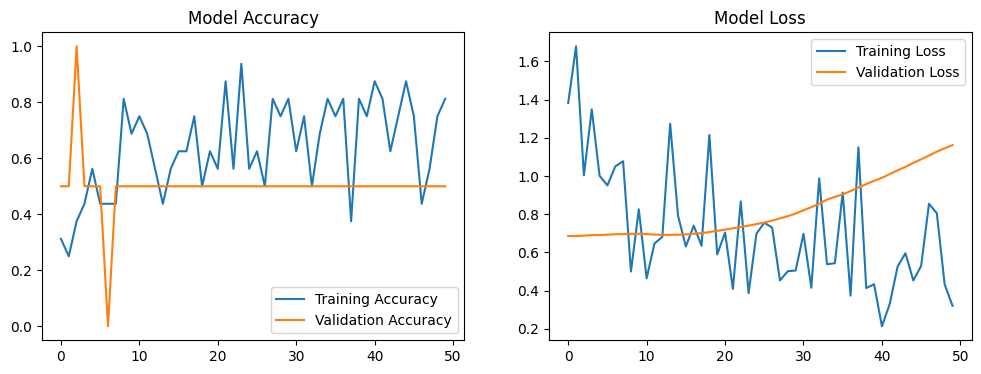

In [ ]:
#Plot training results

plt.figure(figsize=(12,4))
plt.subplot(1,2,1)
plt.plot(history.history['accuracy'], label='Training Accuracy')
plt.plot(history.history['val_accuracy'], label='Validation Accuracy')
plt.legend()
plt.title('Model Accuracy')
plt.subplot(1,2,2)
plt.plot(history.history['loss'], label='Training Loss')
plt.plot(history.history['val_loss'], label='Validation Loss')
plt.legend()
plt.title('Model Loss')
plt.show()

In [ ]:
#Save the model

model.save('flaw_chocolate_cake_detection.h5')

0 represents "no flaw", and 1 represents "flaw detected".


Prediction Interpretation:

The predict_flaw function now includes a threshold (default 0.5) to classify the prediction as flaw or no flaw.

In [ ]:
def predict_flaw(image_path, threshold=0.5):

  img = tf.keras.preprocessing.image.load_img(image_path, target_size=(238, 238))

  image_array = tf.keras.preprocessing.image.img_to_array(img)
  image_array = tf.expand_dims(image_array, 0)

  prediction = model.predict(image_array)
  score = predcition[0][0]

  if score >= threshold:
    return "Production Error Detected! - Confidence: {score:.2f}"
  else:
    return "No Production Error. - Confidence: {1-score:.2f"

In [ ]:
# Example usage:
# print(predict_flaw('path/to/test/image.jpg'))